# Building a Simple Neural Network

Welcome to the first lab of this course!

In this lab, you'll build and train your first neural network, a single neuron that learns patterns from data to make predictions.

You'll work with the delivery scenario from the lecture videos: You're a bike delivery person with a 7-mile delivery order. Your company promises delivery in under 30 minutes, and one more late delivery could put your job at risk. **Can you make this delivery on time?** Your neural network will learn from historical delivery data to help you decide.

Following the Machine Learning (ML) pipeline from the lecture videos, you will:
- **Prepare** delivery data, the distances and times from past orders.  
- **Build** a simple neural network using PyTorch (just one neuron!).
- **Train** it to find the relationship between distance and delivery time.
- **Predict** whether you can make that 7-mile delivery in time.

In [1]:
import torch


In [2]:
import torch.nn as nn

In [3]:
import torch.optim as optim

import helper_utils

# For reproduceability and consitency.

torch.manual_seed(42)

## The Machine Learning Pipeline in Action

It's time to build your first model! To solve the delivery problem, you will apply *relevant* stages of the **Machine Learning Pipeline**.

While the full pipeline provides a comprehensive framework, its strength is its adaptability. For this problem, you will focus on the essential steps needed to build a predictive model from your data.

### Stage 1 & 2: Data Ingestion and Preparation

Time to prepare your delivery data for training. In the ML pipeline, this combines two stages: **Data Ingestion** (gathering raw data) and **Data Preparation** (cleaning it up). In more realistic projects, you'd pull delivery logs from a data source and fix errors or missing values. For this lab, that work is already done, but with a twist. This isn't the same data from the lecture videos. You're looking at a different set of deliveries, which means your model might find a different pattern and make a different prediction for that 7-mile delivery.

* Define the two essential [tensors](https://docs.pytorch.org/docs/stable/tensors.html) for your task:
    * The `distances` tensor contains how far you biked for four recent deliveries (in miles).
    * The `times` tensor shows how long each delivery took (in minutes).
    * `dtype=torch.float32` sets your data type to 32-bit floating point values for precise calculations.

In [16]:
# Distances in miles for recent bike deliveries
distances = torch.tensor([[1.0], [2.0], [3.0], [4.0]], dtype=torch.float32)

# Corresponding delivery times in minutes 
times = torch.tensor([[6.96], [12.11], [16.77], [22.21]], dtype=torch.float32)

### Stage 3: Model Building

Now you'll create your model (this is stage 3 of the ML pipeline: **Model Building**). For bike deliveries, you'll assume a linear relationship between distance and time, a reasonable starting point. Your model will be a single neuron that learns this relationship.

Remember from the lecture videos, a single neuron with one input implements a linear equation: 

> <code>Time = W × Distance + B</code>

Your job is to find the best values for the **weight (W)** and **bias (B)** that fit your delivery data.

* Use <code>nn.[Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)(nn.[Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)(1, 1))</code> to create a linear model.
    * `nn.Linear(1, 1)`: The first `1` means it takes one input (distance), and the second `1` means one neuron that is producing one output (predicted time).
    * This single linear layer will automatically manage the weight and bias parameters for you.

In [17]:
#create a model with one input (distance) and one output
model = nn.Sequential(nn.Linear(1,1))

### Stage 4: Training

Time to train your neural network (this is stage 4 of the ML pipeline: **Training**). You need two key tools to help your model learn from the data:

* **Loss Function:** <code>nn.[MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html)</code> defines the Mean Squared Error loss function.
    * It measures how wrong your predictions are. If you predict 25 minutes but the actual delivery took 30 minutes, the loss function quantifies that 5-minute error. The model's goal is to minimize this error.
* **Optimizer:** <code>[optim](https://pytorch.org/docs/stable/optim.html).[SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)</code> sets up the Stochastic Gradient Descent optimizer. It adjusts your model's weight and bias parameters based on the errors.
    * `lr=0.01`: This learning rate controls how big each adjustment step is. Too large and you might overshoot the best values; too small and training takes forever.

In [18]:
# Define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

Now it's time for your model to learn. The training loop is where your model cycles through the data repeatedly, gradually discovering the relationship between distance and delivery time.

You'll train for `500` epochs (complete passes through your data). During each epoch, these steps occur:

* <code>optimizer.[zero_grad()](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.zero_grad.html)</code>: Clears gradients from the previous round. Without this, PyTorch would accumulate adjustments, which could break the learning process.

* `outputs = model(distances)`: Performs the "forward pass", where the model makes predictions based on the input `distances`.

* `loss = loss_function(outputs, times)`: Calculates how wrong the predicted `outputs` are by comparing them to the actual delivery `times`.

* <code>loss.[backward()](https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html)</code>: The "backward pass" (backpropagation) is performed, which calculates exactly how to adjust the weight and bias to reduce the error.

* <code>optimizer.[step()](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.step.html)</code>: Updates the model's parameters using those calculated adjustments.

* The loss is printed every 50 epochs to allow you to track the model's learning progress as the error decreases.

In [19]:
# Training loop
for epoch in range(500):
    # Reset the optimizer's gradients
    optimizer.zero_grad()
    # Make predictions (forward pass)
    outputs = model(distances)
    # Calculate the loss
    loss = loss_function(outputs, times)
    # Calculate adjustments (backward pass)
    loss.backward()
    # Update the model's parameters
    optimizer.step()
    # Print loss every 50 epochs
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss.item()}")

Epoch 50: Loss = 0.04907665401697159
Epoch 100: Loss = 0.04294542223215103
Epoch 150: Loss = 0.03840433061122894
Epoch 200: Loss = 0.035039834678173065
Epoch 250: Loss = 0.0325472392141819
Epoch 300: Loss = 0.030700024217367172
Epoch 350: Loss = 0.029331669211387634
Epoch 400: Loss = 0.0283175278455019
Epoch 450: Loss = 0.027566134929656982
Epoch 500: Loss = 0.027009498327970505


#### Visualizing the Training Results

Let's see what your model learned. By plotting the model's predictions as a line against your actual delivery data points, you can check if it found a good pattern.

The helper function, `plot_results`, will show you:
* Your original data points (actual deliveries)
* The line your model learned (its predictions)
* How well they match

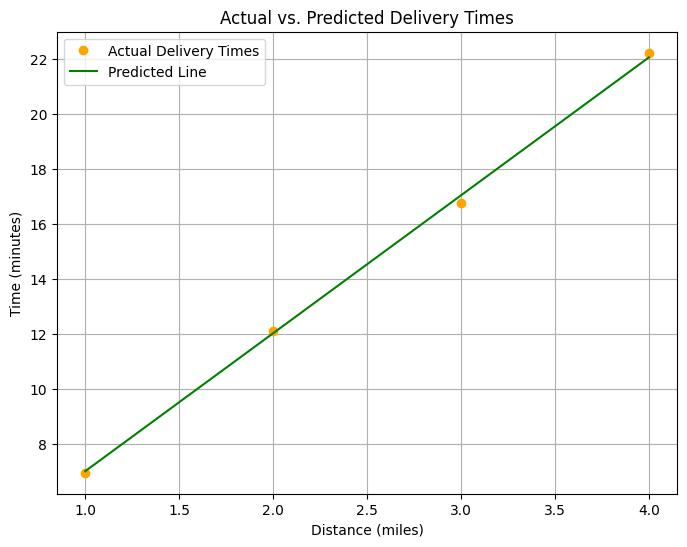

In [20]:
helper_utils.plot_results(model, distances, times)

### Make Your Prediction

Your model is trained. Now for the moment of truth. **Can you make that 7-mile delivery in under 30 minutes?**

While a full evaluation would test the model on many unseen data points, here you'll jump straight to its intended purpose: making a **data-driven prediction** for a specific delivery.

* First, you'll set the `distance_to_predict` variable.
    * It is initially set to `7.0` to solve the original problem.
    * After running the code, you can easily come back and change this single variable to get predictions for any other distance.
* This variable is then used to create the input tensor for the model.

In [23]:
distance_to_predict = 7.0

* The entire prediction process is wrapped in a `with torch.no_grad()` block.
    * This tells PyTorch you're not training anymore, just making a prediction. This makes the process faster and more efficient.
* A new input tensor is created using the `distance_to_predict` variable.
    * This must be formatted as a 2D tensor (`[[7.0]]`), as the model expects this specific structure, not a simple number.
* Your trained `model` is called with this new tensor to generate a `predicted_time`.
* After getting the prediction (which is also a tensor), the code extracts the actual numerical value from it using `.item()`.

In [24]:
# Use the torch.no_grad() context manager for efficient predictions
with torch.no_grad():
    # Convert the Python variable into a 2D PyTorch tensor that the model expects
    new_distance = torch.tensor([[distance_to_predict]], dtype=torch.float32)
    
    # Pass the new data to the trained model to get a prediction
    predicted_time = model(new_distance)
    
    # Use .item() to extract the scalar value from the tensor for printing
    print(f"Prediction for a {distance_to_predict}-mile delivery: {predicted_time.item():.1f} minutes")

    # Use the scalar value in a conditional statement to make the final decision
    if predicted_time.item() > 30:
        print("\nDecision: Do NOT take the job. You will likely be late.")
    else:
        print("\nDecision: Take the job. You can make it!")

Prediction for a 7.0-mile delivery: 37.1 minutes

Decision: Do NOT take the job. You will likely be late.


<br>

Congratulations! You've successfully trained and used your first neural network in PyTorch to solve a practical problem!

Your model predicted that a `7-mile` delivery would take more than 30 minutes. Based on this prediction, you made the data-driven decision to turn down the job, protecting yourself from being late and putting your job at risk.

## Inspecting the Model's Learning

Now that you have a working model, let's see the exact relationship it learned from the data. You can do this by inspecting the model's internal parameters, the final **weight** and **bias** values it discovered during training. These values define the precise line your model is now using to make predictions.

In [25]:
# Access the first (and only) layer in the sequential model
layer = model[0]

# Get weights and bias
weights = layer.weight.data.numpy()
bias = layer.bias.data.numpy()

print(f"Weight: {weights}")
print(f"Bias: {bias}")

Weight: [[5.00789]]
Bias: [2.007346]


<br>

**Interpreting the Results**

These learned parameters have real-world meaning in the context of your delivery problem:

* **Weight (~5.0)**: This means that for each additional mile, your model predicts the delivery time will increase by about 5.0 minutes.

* **Bias (~2.0)**: This represents the base time for any delivery, regardless of distance. Think of it as the time needed to pick up the order and get on your bike.

Your model has discovered a linear relationship between distance and time. With the **W** and **B** values it learned, it can now predict delivery times for any distance using the equation:

> <code>Time = 5.0 * Distance + 2.0</code>

## Testing Your Model on More Complex Data

Your company is expanding its delivery services. To handle longer routes more efficiently, **any delivery over 3 miles will now be made by car instead of bike.**

That means your dataset just changed. It now includes a mix of bike and car deliveries, two different kinds of trips. You already have a model that worked well before. **But will it still work now?** Let’s take a closer look.

* Define the new dataset, which includes the original bike data plus new data points for longer-distance car deliveries.
    * `new_distances`: A tensor containing distances from 1 to 20 miles.
    * `new_times`: A tensor with the corresponding delivery times for the combined dataset.

In [26]:
#combined dataset: bikes for short distances, cars for longer distances 
new_distances = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]
], dtype=torch.float32)

# Corresponding delivery times in minutes
new_times = torch.tensor([
     [6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]
],dtype=torch.float32)

Noe let's test how well our bike-model handles this new mixed dataset.

- Use the traine **model** to generate predictions on the **new distances**

In [27]:
# Use the already-trained linear model to make predictions
with torch.no_grad():
    predictions = model(new_distances)

- Calculate the **new_loss** between the model's predictions and the actual times
- Notice how the printed loss value will be significantly higher than the loss at the end of training. This will indicate a poor fit.

In [28]:
# Calculate the new loss
new_loss = loss_function(predictions, new_times)
print(f"loss on new, combined data: {new_loss.item():.2f}")

loss on new, combined data: 180.15


To understand why bthe loss is so high, let's visualize what's happening. This plot reveals why your linear model struggles with\ the new data.


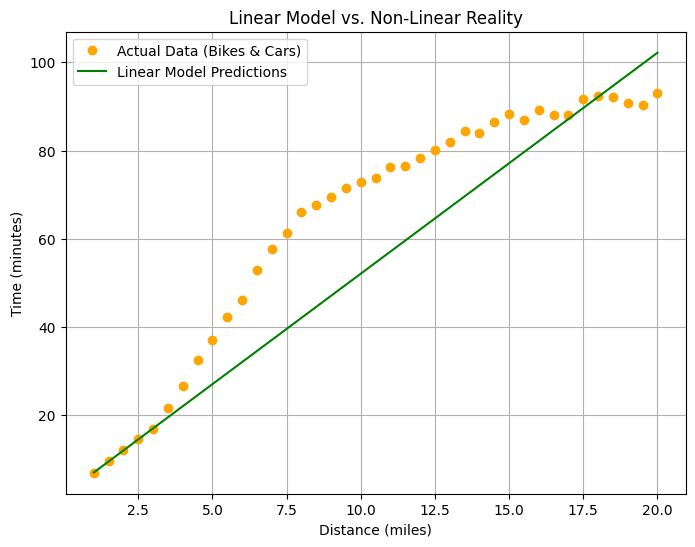

In [29]:
helper_utils.plot_nonlinear_comparison(model, new_distances, new_times)